# CSE527 Homework2
**Due date: 23:59 on Mar 20, 2020 (Sat.)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*

## Description
---
In this homework you will experiment with SIFT features for scene matching and object recognition. You will work with the SIFT tutorial and code from the University of Toronto. In the compressed homework file, you will find the tutorial document (tutSIFT04.pdf) and a paper from the International Journal of Computer Vision (ijcv04.pdf) describing SIFT and object recognition. Although the tutorial document assumes matlab implemention, you should still be able to follow the technical details in it. In addition, you are **STRONGLY** encouraged to read this paper unless you’re already quite familiar with matching and recognition using SIFT.

There are 3 problems in this homework with a total of 100 points. Two bonus questions with extra 5 and 15 points are provided under problem 1 and 2 respectively. The maximum points you may earn from this homework is 100 + 20 = 120 points. Be sure to read **Submission Guidelines** below. They are important.



## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

**We strongly recommend you to use SIFT methods in Colab for this homework**, the details will be described in the next section.

However, if you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 3.4.3. If we use SIFT method directly, typically we will get this error message:

```
error: OpenCV(3.4.3) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

```

One simple way to use the OpenCV in-built function `SIFT` in Colab is to switch the version to the one from 'contrib'. Below is an example of switching OpenCV version:

1. Run the following command in one section in Colab, which has already been included in this assignment:
```
pip install opencv-contrib-python==3.4.2.16
```
2. Restart runtime by
```
Runtime -> Restart Runtime
```

Then you should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [1]:

#%pip uninstall opencv-python
#%pip uninstall opencv-contrib-python 
%pip install opencv-python==3.4.2.17
%pip install opencv-contrib-python==3.4.2.17


Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? n
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? n
     |████████████████████████████████| 25.0MB 143kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 100kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version
import os
import copy
import random
import sys

3.4.2


In [3]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Replace '------' with the path such that "CSE527-20S-HW2" is your working directory
%cd '/content/gdrive/My Drive/CSE527-21S-HW2'


/content/gdrive/My Drive/CSE527-21S-HW2


## Problem 1: Match transformed images using SIFT features
{40 points + bonus 5} You will transform a given image, and match it back to the original image using SIFT keypoints. 

- **Step 1 (5pt)**. Use the function from SIFT class to detect keypoints from the given image. Plot the image with keypoints scale and orientation overlaid.

- **Step 2 (10pt)**. Rotate your image clockwise by 45 degrees with the `cv2.warpAffine` function. Extract SIFT keypoints for this rotated image and plot the rotated picture with keypoints scale and orientation overlaid just as in step 1.

- **Step 3 (15pt)**. Match the SIFT keypoints of the original image and the rotated imag using the `knnMatch` function in the `cv2.BFMatcher` class. Discard bad matches using the ratio test proposed by D.Lowe in the SIFT paper. Use **0.1** as the ratio in this homework. Note that this is for display purpose only. Draw the filtered good keypoint matches on the image and display it. The image you draw should have two images side by side with matching lines across them.

- **Step 4 (10pt)**. Use the RANSAC algorithm to find the affine transformation from the rotated image to the original image. You are not required to implement the RANSAC algorithm yourself, instead you could use the `cv2.findHomography` function (set the 3rd parameter `method` to `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated image back using this matrix and the `cv2.warpPerspective` function. Display the recovered image.

- **Bonus (5pt)**. You might have noticed that the rotated image from step 2 is cropped. Rotate the image without any cropping and you will be awarded an extra 5 points.

Hints: In case of too many matches in the output image, use the ratio of 0.1 to filter matches.

The image is a duplicate of *Table in front of window* by Pablo Picasso. See https://www.pablopicasso.org/ for more stories about Pablo Picasso and https://www.wikiart.org/en/pablo-picasso/table-in-front-of-window-1919 for more information about this work.


In [5]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale or Color images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    # stack if the inputs are gray images
    if len(img1.shape) == 2:
      img1 = np.dstack([img1, img1, img1])
    if len(img2.shape) == 2:
      img2 = np.dstack([img2, img2, img2]) 
 
    out[:rows1, :cols1, :] = img1

    # Place the next image to the right of it
    out[:rows2, cols1:, :] = img2

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:
        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)
    # Also return the image if you'd like a copy
    return out

# Read image
img_input = cv2.imread('SourceImages/Picasso.png')

##########--WRITE YOUR CODE HERE--##########
# initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp, des = sift.detectAndCompute(cv2.cvtColor(img_input,cv2.COLOR_BGR2GRAY),None)

# Draw keypoints on the image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res1=copy.deepcopy(img_input)
res1 = cv2.drawKeypoints(img_input,kp,res1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #NOT SURE IF RES1

# rotate image
# use cv2.warpAffine to rotate image
rows,cols, channels = img_input.shape
#rotation matrix
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45,1)

#alterations done so as to avoid cropping img
cosofM = np.abs(M[0][0])
sinofM = np.abs(M[0][1])

newImageHeight = int((rows * sinofM) + (cols * cosofM))
newImageWidth = int((rows * cosofM) + (cols * sinofM))

M[0][2] =  M[0][2] + (newImageWidth/2) - (cols//2)
M[1][2] = M[1][2] + (newImageHeight/2)- (rows//2)

img_input_rot = cv2.warpAffine(img_input,M,(newImageWidth,newImageHeight))

# find the keypoints and descriptors on the rotated image
sift_rot = cv2.xfeatures2d.SIFT_create()
kp_rot, des_rot = sift_rot.detectAndCompute(cv2.cvtColor(img_input_rot,cv2.COLOR_BGR2GRAY),None)

# Draw keypoints on the rotated image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res2 = copy.deepcopy(img_input_rot)
res2 = cv2.drawKeypoints(img_input_rot,kp_rot,res2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##########-------END OF CODE-------##########

# Plot result images
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB));
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB));
plt.title('rotated img')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# compute feature matching
# use the knnMatch function in the cv2.BFMatcher class
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_rot,des, k=2) #best descriptors flag = 2

# Apply ratio test to keep good matches; ratio=0.1
good = [] 
#ratio test
for m,n in matches:
    if m.distance < (0.1*n.distance):
        good.append([m])

# draw matching results with the given drawMatches function
res3 = cv2.drawMatchesKnn(img_input_rot,kp_rot,img_input,kp,good,None, flags=2)
##########-------END OF CODE-------##########

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB));
plt.title('matching')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# find perspective transform matrix using RANSAC
# use cv2.findHomography
src_pts = np.float32([kp_rot[m[0].queryIdx].pt for m in good])
dst_pts = np.float32([kp[m[0].trainIdx].pt for m in good])

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

# mapping rotataed image back with the calculated rotation matrix
# use cv2.warpPerspective
res4 =  cv2.warpPerspective(img_input_rot, M, (cols, rows))
##########-------END OF CODE-------##########


# plot result images
plt.figure(figsize=(14,8));
plt.subplot(1, 2, 1);
plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB));
plt.title('original img');
plt.axis('off');

plt.subplot(1, 2, 2);
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB));
plt.title('recovered img');
plt.axis('off');


Output hidden; open in https://colab.research.google.com to view.

## Problem 2: Scene stitching with SIFT features
{30 points + 15 bonus} You will match and align between different views of a scene with SIFT features. 

Use `cv2.copyMakeBorder` function to pad the center image with zeros into a larger size. Extract SIFT features for all images and go through the same procedures as you did in problem 1. Your goal is to find the affine transformation between the two images and then align one of your images to the other using `cv2.warpPerspective`. Use the `cv2.addWeighted` function (or your own implementation) to blend the aligned images and show the stitched result. Examples can be found at http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html.
Use parameters **0.5 and 0.5** for alpha blending.

- **Step 1 (15pt)**. Compute the transformation from the right image to the center image. Warp the right image with the computed transformation. Stitch the center and right images with alpha blending. Display the SIFT feature matching between the center and right images like you did in problem 1. Display the stitched result (center and right image).

- **Step 2 (15pt)** Compute the transformation from the left image to the stitched image from step 1. Warp the left image with the computed transformation. Stich the left and result images from step 1 with alpha blending. Display the SIFT feature matching between the result image from step 1 and the left image like what you did in problem 1. Display the final stitched result (all three images).

- **Bonus (15pt)**. Instead of using `cv2.addWeighted` to do the blending, implement Laplacian Pyramids to blend the two aligned images. Tutorials can be found at http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html. Display the stitched result (center and right image) and the final stitched result (all three images) with laplacian blending instead of alpha blending.

Note that for the resultant stitched image, some might have different intensity in the overlapping and other regions, namely the overlapping region looks brighter or darker than others. To get full credit, the final image should have uniform illumination.

Hints: You need to find the warping matrix between images with the same mechanism from problem 1. You will need as many reliable matches as possible to find a good homography so DO NOT use 0.1 here. A suggested value would be 0.75 in this case.

When you warp the image with cv2.warpPerspective, an important trick is to pass in the correct parameters so that the warped image has the same size with the padded_center image. Once you have two images with the same size, find the overlapping part and do the blending.

The images are the Building of Stony Brook Mathematics Department and Institute for Mathematical Sciences taken by Tao.

In [31]:
imgCenter = cv2.imread('SourceImages/maths_m.jpg', cv2.IMREAD_COLOR)
imgRight = cv2.imread('SourceImages/maths_r.jpg', cv2.IMREAD_COLOR)
imgLeft = cv2.imread('SourceImages/maths_l.jpg', cv2.IMREAD_COLOR)

# initalize the stitched image as the center image
# the following is recommended padding size, DO NOT change it 
imgCenter = cv2.copyMakeBorder(imgCenter,160,160,400,400,cv2.BORDER_CONSTANT)

def alpha_blending(img_A, img_B):    
    # Implement alpha_blending, using 0.5 and 0.5 for alphas
    ##########--WRITE YOUR CODE HERE--##########
    alpha = .5
    blended = cv2.addWeighted(img_A, alpha, img_B, alpha, 0)
    #blended = copy.deepcopy(img_A).astype(np.float32)
    #for i in range(0,len(img_A)):
    #  for j in range(0,len(img_A[i])):
    #    if((list(img_A[i][j])==[0,0,0])and (list(img_B[i][j])!=[0,0,0])):
    #      blended[i][j] = img_B[i][j]
    #    elif((list(img_A[i][j])!=[0,0,0])and (list(img_B[i][j])!=[0,0,0])):
    #      blended[i][j]= (alpha*img_A[i][j]) + (alpha*img_B[i][j])
      
    #blended = blended.astype('uint8')

    #to avoid intensity contrast ==> same as only alpha blending in center
    for i in range(0,len(blended)):
      for j in range(0,len(blended[i])):
        if(list(img_A[i][j]) == [0,0,0]):
         blended[i][j] = img_B[i][j]
        elif(list(img_B[i][j]) == [0,0,0]):
          blended[i][j] = img_A[i][j]

    ##########-------END OF CODE-------##########
    return blended
    

def Laplacian_blending(img_A, img_B, num_levels=5, mask=None):
    # Implement Laplacian_blending
    # num_levels is the number of levels in the pyramids
    # assume mask is float32 [0,1], it has the same size as img_A and img_B
    # the mask indicates which parts of img_A or img_B are blended together
    # a simple example could be  
    # mask = np.hstack([np.zeros([img_A.shape[0],img_A.shape[1]//2,img_A.shape[2]], np.float32),
    #  np.ones([img_B.shape[0],img_B.shape[1]//2,img_B.shape[2]], np.float32)])
    # but it depends on your choice
    # you may even skip this parameter if you always use one-half 0s and one-half 1s like the tutorial

    assert img_A.shape == img_B.shape
    assert img_A.shape == mask.shape
    ##########--WRITE YOUR CODE HERE--########## 
    # generate Gaussian pyramids for img_A, img_B and corresponding masks   
    GA = img_A.copy().astype(np.float32)
    gpA = [GA]
    GB = img_B.copy().astype(np.float32)
    gpB = [GB]
    GM = mask.copy()
    gpM = [GM]

    for i in range(num_levels):
      #Gaussian img A
      GA = (cv2.pyrDown(GA))
      gpA.append(GA)
      #Gaussian img B
      GB = (cv2.pyrDown(GB))
      gpB.append(GB) 
      #gaussian of Mask
      GM = (cv2.pyrDown(GM))
      gpM.append(GM)      

    # generate Laplacian pyramids for img_A, img_B and corresponding masks 
    lpA = [gpA[num_levels-1]]
    lpB = [gpB[num_levels-1]]
    gpM_new = [gpM[num_levels -1]]
    for i in range(num_levels - 1, 0, -1):
      #gaussian mask of higher res
      gpM_new.append(gpM[i-1])

      #laplace of img A
      GE_A = (cv2.pyrUp(gpA[i]))
      LA = cv2.subtract(gpA[i-1],GE_A)
      lpA.append(LA)
      
      #laplace of img b
      GE_B = (cv2.pyrUp(gpB[i]))
      LB = cv2.subtract(gpB[i-1],GE_B)
      lpB.append(LB)
  

    # now blend images with your mask in each level
    LS = []
    for gm, la,lb in zip(gpM_new, lpA,lpB):
      #necessary for np mult
      la = np.array(la)
      lb = np.array(lb)
      gm = np.array(gm)

      a_part = np.multiply(la, gm)
      b_part = np.multiply(lb, (1.0-gm))    

      ls = a_part + b_part
      LS.append(ls)
    
    # now reconstruct the blended image
    ls_ = LS[0]
    for i in range(1,num_levels):
      ls_ = cv2.pyrUp(ls_)
      ls_ = cv2.add(ls_, LS[i])

    #over saturation
    ls_[ls_ > 255] = 255
    ls_[ls_<0] = 0    
    blended = ls_.astype('uint8')

    ##########-------END OF CODE-------##########
    return blended

def getTransform(img1, img2):
    ##########--WRITE YOUR CODE HERE--##########
    # compute sift descriptors
    sift1 = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift1.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY),None)
    sift2 = cv2.xfeatures2d.SIFT_create()
    kp2, des2 = sift2.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY),None)

    # find all matches
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # apply ratio test, use ratio = 0.75
    good = []
    for m,n in matches:
      if m.distance < 0.75*n.distance:
        good.append([m])
        
    # draw matches
    img_match = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None, flags=2)

    # find perspective transform matrix using RANSAC
    src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good])
    dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good])

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

    ##########-------END OF CODE-------##########
    # H is the perspective transform matrix
    # img_match is the image returned by drawMatches
    return H, img_match

def perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    # Get homography from right to center
    # img_match_cr is your first output
    # call getTransform to get the transformation from the right to the center image
    H_right, img_match_cr = getTransform(imgRight, imgCenter)

    # Blend center and right
    # stitched_cr is your second output, returned by alpha_blending 
    # call alpha_blending
    
    #pad center image for no reason
    img_center_new = cv2.copyMakeBorder(imgCenter, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 0)

    #get boundaries
    rows_right, cols_right, _ = imgRight.shape
    rows_center, cols_center, _ = img_center_new.shape

    #get corner pts of right img
    P = np.array([[0, cols_right, cols_right, 0], [0,0, rows_right, rows_right], [1,1,1,1]])
    #see how they are transformed
    P_prime = np.matmul(H_right, P)
    x = np.divide(P_prime[0],P_prime[2])
    y = np.divide(P_prime[1],P_prime[2])
    
    #new bounds of new image
    height_right_new = int(max(y))
    width_right_new = int(max(x))
    
    #new transorfmed image
    img_right_new = cv2.warpPerspective(imgRight, H_right, (width_right_new, height_right_new))

    #add boarder to right image for difference
    dif_y = (rows_center - height_right_new)
    dif_x = (cols_center - width_right_new)
    img_right_new = cv2.copyMakeBorder(img_right_new, 0, dif_y, 0, dif_x, cv2.BORDER_CONSTANT, 0)

    #stitch center and right
    stitched_cr = alpha_blending(img_center_new, img_right_new)
    # Get homography from left to stitched center_right
    # img_match_lcr is your third output
    # call getTransform to get the transformation from the left to stitched_cr
    #left shape
    rows_left, cols_left, _ = imgLeft.shape
  
    #transformation
    H_left, img_match_lcr = getTransform(imgLeft, stitched_cr)  
    # Blend left and center_right
    # stitched_lcr is your fourth output, returned by alpha_blending  
    # call alpha_blending

    #get corner points into array
    P = np.array([[0, cols_left, cols_left, 0], [0,0, rows_left, rows_left], [1,1,1,1]])
    P_prime = np.matmul(H_left, P)
    #find corner pt new location
    x = np.divide(P_prime[0],P_prime[2])
    y = np.divide(P_prime[1],P_prime[2])

    #new bounds of new image
    height_left_new = int(max(y))
    width_left_new = int(max(x))

    #transform left
    img_left_new = cv2.warpPerspective(imgLeft, H_left, (width_left_new, height_left_new))

    #add border to left to match center
    dif_y = (rows_center - height_left_new)
    dif_x = (cols_center - width_left_new)
    img_left_new = cv2.copyMakeBorder(img_left_new, 0, dif_y, 0, dif_x, cv2.BORDER_CONSTANT, 0)

    #final stitched result
    stitched_lcr = alpha_blending(img_left_new, stitched_cr)
    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr 

def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    # Get homography from right to center
    # call getTransform to get the transformation from the right to the center image
    H_right, img_match_cr = getTransform(imgRight, imgCenter)
    
    # Blend center and right
    # stitched_cr is your first bonus output, returned by Laplacian_blending 
    # call Laplacian_blending 
    rows_right, cols_right, _ = imgRight.shape
    rows_center, cols_center, _ = imgCenter.shape

    #get corner pts of right img
    P = np.array([[0, cols_right, cols_right, 0], [0,0, rows_right, rows_right], [1,1,1,1]])
    #see how they are transformed
    P_prime = np.matmul(H_right, P)
    x = np.divide(P_prime[0],P_prime[2])
    y = np.divide(P_prime[1],P_prime[2])
    
    #new bounds of new image
    height_right_new = int(max(y))
    width_right_new = int(max(x))
    #new transorfmed image
    img_right_new = cv2.warpPerspective(imgRight, H_right, (width_right_new, height_right_new))
    
    #new bounds
    dif_y = (rows_center - height_right_new)
    dif_x = (cols_center - width_right_new)
    img_right_new = cv2.copyMakeBorder(img_right_new, 0, dif_y, 0, dif_x, cv2.BORDER_CONSTANT, 0)

    #new stitched result
    stitched_cr = Laplacian_blending(img_right_new, imgCenter, 4, np.hstack([np.zeros([imgCenter.shape[0],imgCenter.shape[1]//2,imgCenter.shape[2]], np.float32),
                                                                             np.ones([img_right_new.shape[0],img_right_new.shape[1]//2,img_right_new.shape[2]], np.float32)]))
    
    # Get homography from left to stitched center_right
    # call getTransform to get the transformation from the left to stitched_cr
    H_left, img_match_lcr = getTransform(imgLeft, stitched_cr)
    
    # Blend left and center_right
    # stitched_lcr is your second bonus output, returned by Laplacian_blending
    # call Laplacian_blending
    rows_left, cols_left, _ = imgLeft.shape
    #get corner points into array
    P = np.array([[0, cols_left, cols_left, 0], [0,0, rows_left, rows_left], [1,1,1,1]])
    P_prime = np.matmul(H_left, P)
    #find corner pt new location
    x = np.divide(P_prime[0],P_prime[2])
    y = np.divide(P_prime[1],P_prime[2])

    #new bounds of new image
    height_left_new = int(max(y))
    width_left_new = int(max(x))

    img_left_new = cv2.warpPerspective(imgLeft, H_left, (width_left_new, height_left_new))

    #add border to left to match center
    dif_y = (rows_center - height_left_new)
    dif_x = (cols_center - width_left_new)
    img_left_new = cv2.copyMakeBorder(img_left_new, 0, dif_y, 0, dif_x, cv2.BORDER_CONSTANT, 0)
    stitched_lcr = Laplacian_blending( stitched_cr, img_left_new, 4, np.hstack([np.zeros([imgCenter.shape[0],imgCenter.shape[1]//2,imgCenter.shape[2]], np.float32),
                                                                             np.ones([img_right_new.shape[0],img_right_new.shape[1]//2,img_right_new.shape[2]], np.float32)]))
    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr 


img_match_cr, stitched_cr, img_match_lcr, stitched_lcr = perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight)
img_match_cr_lap, stitched_cr_lap, img_match_lcr_lap, stitched_lcr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)
        
plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(img_match_cr, cv2.COLOR_BGR2RGB));
plt.title("center and right matches");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_cr, cv2.COLOR_BGR2RGB));
plt.title("center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 3);
plt.imshow(cv2.cvtColor(img_match_lcr, cv2.COLOR_BGR2RGB));
plt.title("left and center_right matches");
plt.axis('off');
plt.subplot(4, 1, 4);
plt.imshow(cv2.cvtColor(stitched_lcr, cv2.COLOR_BGR2RGB));
plt.title("left, center, right: stitched result");
plt.axis('off');
plt.show();

plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(stitched_cr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_lcr_lap, cv2.COLOR_BGR2RGB));
plt.title("Bonus, left, center, right: stitched result");
plt.axis('off');


Output hidden; open in https://colab.research.google.com to view.

## Problem 3: Object Recognition with HOG features
{30 points} You will use the histogram of oriented gradients (HOG) to extract features from objects and recognize them.

HOG decomposes an image into multiple cells, computes the direction of the gradients for all pixels in each cell, and creates a histogram of gradient orientation for that cell. Object recognition with HOG is usually done by extracting HOG features from a training set of images, learning a support vector machine (SVM) from those features, and then testing a new image with the SVM to determine the existence of an object.

You can use `cv2.ml.SVM_create` for SVMs. You can also use Python machine learning packages for SVM, e.g.`scikit-learn` and for HoG computation, e.g. `scikit-image`. Please find the OpenCV SVM tutorial at https://www.learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/.

An image set located under SourceImages/ETH-80 is provided containing images of two class: **apple** and **pear**. You will first train an SVM with the HoG features and then predict the class of an image with the trained SVM. The images have been split into training set (folder 1) and test set (folder 2).

Some of the function names and arguments are provided, you may change them as you need.

- **Step 1 (5pts)**. Load in the images and create a vector of corresponding labels (0 for apple and 1 for pear). An example label vector should be something like [1,1,1,1,1,0,0,0,0,0]. Display any four apple images and any four pear images of **training set** in a 2 x 4 grid with figsize = (20, 5).

- **Step 2 (10pts)**. Extract HoG features from all images. You can use hog routine from `scikit-image`. Display the HoG features for the four apple images and four pear images **chosen in step 1** in a 2 x 4 grid with figsize = (20, 5).

- **Step 3**. Shuffle your training date including features and labels. Reshape the HoG feature matrix as necessary to feed into the SVM. Train the classifier. **DO NOT train with test data.** No output is expected from this part.

- **Step 4 (15pts)**. Perform predictions with your trained SVM on the test data. Output a vector of predictions, a vector of ground truth labels, and prediction accuracy.

[reference of ETH-80 dataset] B. Leibe and, B.Schiele. Analyzing Appearance and Contour Based Methods for Object Categorization. CVPR, vol.2, pp. 409-415, 2003

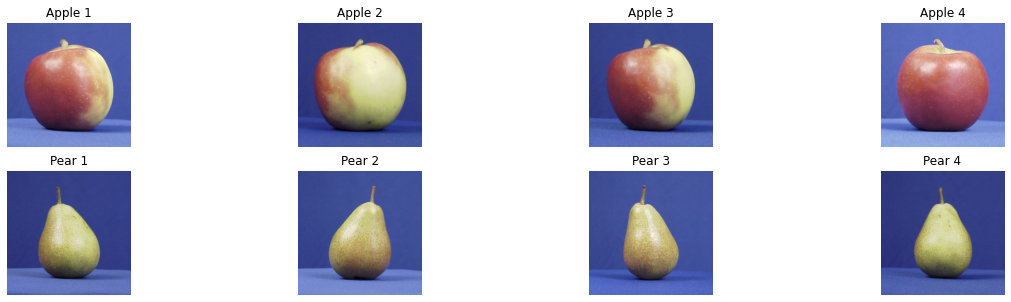

In [6]:
import skimage.exposure
from skimage.feature import hog
from sklearn.svm import LinearSVC

def loadData(path):
  # you can use sorted(os.listdir(path)) to get all files under a directory
  ##########--WRITE YOUR CODE HERE--##########
  img = [cv2.imread(path +"/" + i, cv2.IMREAD_COLOR) for i in sorted(os.listdir(path))]

  ##########-------END OF CODE-------##########
  return img

imgs_train_0 = loadData('SourceImages/ETH-80/apple/1')
imgs_train_1 = loadData('SourceImages/ETH-80/pear/1')
imgs_test_0 = loadData('SourceImages/ETH-80/apple/2')
imgs_test_1 = loadData('SourceImages/ETH-80/pear/2')

# combine class 0 with class 1
imgs_train = imgs_train_0 + imgs_train_1
imgs_test = imgs_test_0 + imgs_test_1

# create class labels, assume apple = 0, pear = 1
labels_train = np.array([0 for i in imgs_train_0] + [1 for i in imgs_train_1])
labels_test = np.array([0 for i in imgs_test_0] + [1 for i in imgs_test_1])

# display ANY 4 apple images and 4 pear images of TRAINING set 
# in a 2 x 4 grid with figsize = (20, 5)
##########--WRITE YOUR CODE HERE--##########
apples_rand = random.sample(imgs_train_0, 4)
pears_rand = random.sample(imgs_train_1, 4) 
plt.figure(figsize=(20,5));
#plot apples
for i in range(0,4):
  plt.subplot(2,4,i+1);
  title = "Apple " + str(i+1)
  plt.imshow(cv2.cvtColor(apples_rand[i], cv2.COLOR_BGR2RGB));
  plt.title(title);
  plt.axis('off');

#plot pears
for i in range(0,4):
  plt.subplot(2,4,i+1+4);
  title = "Pear " + str(i+1)
  plt.imshow(cv2.cvtColor(pears_rand[i], cv2.COLOR_BGR2RGB));
  plt.title(title);
  plt.axis('off');
plt.show()

##########-------END OF CODE-------##########



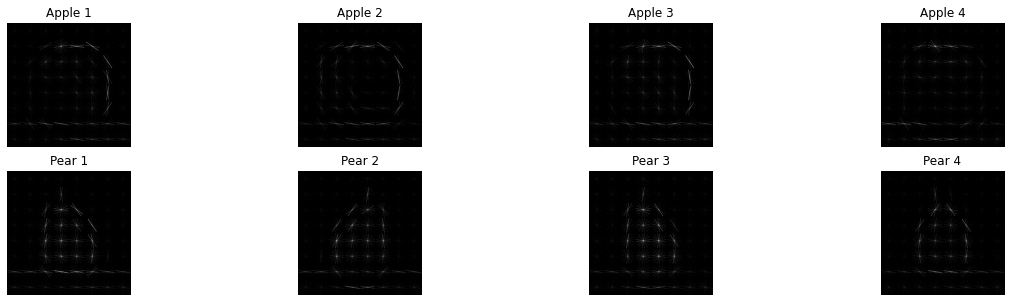

In [7]:
# Compute HOG features for the images
def computeHOGfeatures(image):
    # Compute HOG descriptors of a single image
    # you can use skimage.feature.hog and try your own parameters
    ##########--WRITE YOUR CODE HERE--##########
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    hog_descriptor, hog_image = skimage.feature.hog(gray_image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

    ##########-------END OF CODE-------##########   
    return hog_descriptor, hog_image

def computeHOGfeaturesBatch(imgs):
    # Compute HOG descriptors of a batch of images
    ##########--WRITE YOUR CODE HERE--##########

    #list of values
    hog_descriptors = []
    hog_images = []
    for i in range(0,len(imgs)):
      hog_dis, hog_img = computeHOGfeatures(imgs[i])
      hog_descriptors.append(hog_dis)
      hog_images.append(hog_img)    

    hog_images = np.array(hog_images)
    hog_descriptors = np.array(hog_descriptors)

    ##########-------END OF CODE-------##########
    return hog_descriptors, hog_images
  

Hogs_train, Hog_imgs_train = computeHOGfeaturesBatch(imgs_train)
Hogs_test, Hog_imgs_test = computeHOGfeaturesBatch(imgs_test)


# display hog images CORRESPONDING to the 4 apple and 4 pear images you chosed in previous step
# in a 2 x 4 grid with figsize = (20, 5)
##########--WRITE YOUR CODE HERE--##########
hog_discr_apples, hog_images_apples = computeHOGfeaturesBatch(apples_rand)
hog_discr_pears, hog_images_pears = computeHOGfeaturesBatch(pears_rand)
plt.figure(figsize=(20,5));

#apples
for i in range(0,4):
  plt.subplot(2,4,i+1);
  title = "Apple " + str(i+1)
  plt.imshow(hog_images_apples[i], cmap=plt.cm.gray);
  plt.title(title);
  plt.axis('off');

#pears
for i in range(0,4):
  plt.subplot(2,4,i+1+4);
  title = "Pear " + str(i+1)
  plt.imshow(hog_images_pears[i], cmap=plt.cm.gray);
  plt.title(title);
  plt.axis('off');
plt.show()




##########-------END OF CODE-------########## 
  


In [8]:
# create a svm model and set your own hyper-parameters
#as done in the tutorial
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(12)
svm.setGamma(.5)


# shuffle training data
order = np.random.permutation(len(imgs_train))
shuffled_train_hog = np.array([Hogs_train[i] for i in order])
shuffled_train_hog = np.float32(shuffled_train_hog)
shuffled_train_out = np.array([labels_train[i] for i in order])
shuffled_train_out = shuffled_train_out.reshape(len(shuffled_train_out),1)

# train svm with training data
svm.train(shuffled_train_hog, cv2.ml.ROW_SAMPLE, shuffled_train_out)

# make predictions on test data
test_hog = np.float32(np.array(Hogs_test))
labels_test_pred = svm.predict(test_hog)[1].ravel()


# print predictions and accuracy
print('Predicted labels: ', labels_test_pred.astype(np.int32).reshape([-1]))
print('Ground truth labels: ', labels_test.astype(np.int32).reshape([-1]))
print('Accuracy: ', np.mean(labels_test_pred.astype(np.int32)==labels_test.astype(np.int32))*100, '%')

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Ground truth labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  100.0 %


## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through blackboard. This pdf file should be named as **Surname_Givenname_SBUID_hw*.pdf** (example: Jordan_Michael_111134567_hw2.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw*.*** (example: Jordan_Michael_111134567_hw2 for this assignment) in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw2       
        |---SourceImages
        |---[Your_code].ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: ***zuhui.wang@stonybrook.edu***, ***pavani.tripathi@stonybrook.edu*** and ***hefan@cs.stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw2' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
